### <font color='red'> Project Part 2 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

## Objective

-  To predict the Buzz Magnitude (mean number of active discussions) of each topic in Twitter.
    - Sample the dataset using randomization and stratification.
     - Run ensemble techniques like Bagging, Boosting, AdaBoost and Gradient Boosting on the scaled dataset with base regressors with hypertuned parameters identified from Project 2.
    - Apply PCA on the regression dataset.
    - Fit different regression algorithms on the PCA applied data.
        - Select hyperparameters for each regression algorithm using Grid Search CV.
    - Choose evaluation metric and select the best model based on train and test scores.
     - Compare the accuracies of regressors run on PCA applied dataset with regressors ran on the scaled version of the dataset
    - Run a deep learning regressor model on the PCA applied dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

In [2]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [3]:
df_class = pd.read_csv('Twitter-Absolute-Sigma-500.data',header=None,names=columns,index_col=False)
df_reg =  pd.read_csv('Twitter.data',header=None,names=columns,index_col=False)

#### _Data Sampling_

_Taking 10% of the data from entire dataset using randomization and stratification techniques._

In [4]:
X = df_reg.iloc[:,0:77]
y =df_reg['Annotation']
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state=18)

## Evaluation Strategy

**Accuracy Score ($R^2$)** - Percentage of variance in the dependent variable explained by all the features. $R^2$ lies in a range between 0 and 1 with values closer to 1 indicating a very good model fit

### Train -Test split

_Splitting the sample dataset into train set (80%) and test set (20%)_

_Applying MinMaxScaler() on train and test sets to scale the column values between 0 and 1. MinMaxScaler() reduces skewness but doesn't remove it. Since the column values are in the range of 0 to 1, the results will be consistent._

In [5]:
## Train and Test dataset for the cross-validation and Grid Search models
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, test_size = 0.2,random_state=18)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
## Train and Test dataset for the optimized model
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size = 0.2,random_state=18)
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [6]:
X_train.shape

(46660, 77)

## Project 2 - Report and Results

_The table below shows the various Regressors run on the raw dataset as part of Project2. The particular table will be later used for Accuracy Score metric comparison with same models run on PCA applied data._

In [7]:
old_table=pd.DataFrame({'Model Name':['Linear Regression','SGD Regression','KNN Regression','Ridge Regression','Lasso Regression','Polynomial Regression','Linear SVR Regression','Linear Kernel SVR Regression','Rbf Kernel SVR Regression','Poly Kernel SVR Regression'],'Model Parameters':["fit_intercept: True, normalize: True","alpha: 0.05, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1","n_neighbors: 4","alpha: 0.01, fit_intercept: True, normalize: True","alpha: 0.01, fit_intercept: False, normalize: True, selection: random","linearregression__fit_intercept: False, linearregression__normalize: True, polynomialfeatures__degree: 2","C: 1, epsilon: 0.1, loss: squared_epsilon_insensitive","C: 10, epsilon: 1","C: 10, epsilon: 1, gamma: 0.001","C: 10, degree: 2, epsilon: 0.1, gamma: 0.001"],'Train Accuracy':[0.945702,0.923512,0.945159,0.943249,0.943651,0.98116,0.942715,0.843607,-0.038596,-0.07236],'Test Accuracy':[0.962427,0.931561,0.893353,0.960212,0.961776,0.227186,0.959531,0.874634,-0.036365,-0.07164]})
print('\033[1m' + 'PREVIOUS PROJECT REGRESSION MODELS BEST PARAMETER RUN RESULTS' + '\033[0m')
old_table

PREVIOUS PROJECT REGRESSION MODELS BEST PARAMETER RUN RESULTS


,Model Name,Model Parameters,Train Accuracy,Test Accuracy
0,Linear Regression,"fit_intercept: True, normalize: True",0.945702,0.962427
1,SGD Regression,"alpha: 0.05, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1",0.923512,0.931561
2,KNN Regression,n_neighbors: 4,0.945159,0.893353
3,Ridge Regression,"alpha: 0.01, fit_intercept: True, normalize: True",0.943249,0.960212
4,Lasso Regression,"alpha: 0.01, fit_intercept: False, normalize: True, selection: random",0.943651,0.961776
5,Polynomial Regression,"linearregression__fit_intercept: False, linearregression__normalize: True, polynomialfeatures__degree: 2",0.981160,0.227186
6,Linear SVR Regression,"C: 1, epsilon: 0.1, loss: squared_epsilon_insensitive",0.942715,0.959531
7,Linear Kernel SVR Regression,"C: 10, epsilon: 1",0.843607,0.874634
8,Rbf Kernel SVR Regression,"C: 10, epsilon: 1, gamma: 0.001",-0.038596,-0.036365
9,Poly Kernel SVR Regression,"C: 10, degree: 2, epsilon: 0.1, gamma: 0.001",-0.072360,-0.071640


#### All the models used within the ensemble methods are run with the hypertuned parameters identified in Project2

## Base Models For Ensemble Methods

Ridge and Lasso are considered as base estimators for the ensemble methods

In [8]:
linreg=Ridge(alpha=0.01,fit_intercept=True,normalize=True)
lassoreg=Lasso(alpha=0.01,fit_intercept=False,normalize=True,selection='random')

## Bagging Ridge Regression

_Bagging runs a single model over various random subsets of the dataset.Nothing but random sampling with replacement. Here a Ridge regressor is the base estimator for  Bagging_

In [9]:
bag_reg = BaggingRegressor(linreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=18)
bag_reg.fit(X_train,y_train)
bag_reg_accuracy_train = bag_reg.score(X_train,y_train)
bag_reg_accuracy_test = bag_reg.score(X_test,y_test)
print('Linear Regression Bagging - Train Accuracy: %.2f'%bag_reg_accuracy_train)
print('Linear Regression Bagging - Test Accuracy: %.2f '%bag_reg_accuracy_train)

Linear Regression Bagging - Train Accuracy: 0.81
Linear Regression Bagging - Test Accuracy: 0.81 


## Bagging LASSO

_Lasso regressor is taken as base model for performing Bagging_

In [10]:
bag_lasso = BaggingRegressor(lassoreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=18)
bag_lasso.fit(X_train,y_train)
bag_lasso_accuracy_train = bag_lasso.score(X_train,y_train)
bag_lasso_accuracy_test = bag_lasso.score(X_test,y_test)
print('LASSO Regression Bagging - Train Accuracy: %.2f'%bag_lasso_accuracy_train)
print('LASSO Regression Bagging - Test Accuracy: %.2f '%bag_lasso_accuracy_test)

LASSO Regression Bagging - Train Accuracy: 0.92
LASSO Regression Bagging - Test Accuracy: 0.94 


## Pasting Ridge

_Bagging without replacement is called Pasting. Here Ridge regressor is considered as base model_

In [11]:
past_reg = BaggingRegressor(linreg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=18)
past_reg.fit(X_train,y_train)
past_reg_accuracy_train = past_reg.score(X_train,y_train)
past_reg_accuracy_test = past_reg.score(X_test,y_test)
print('Linear Regression Pasting - Train Accuracy: %.2f'%past_reg_accuracy_train)
print('Linear Regression Pasting - Test Accuracy: %.2f '%past_reg_accuracy_train)

Linear Regression Pasting - Train Accuracy: 0.81
Linear Regression Pasting - Test Accuracy: 0.81 


## Pasting LASSO

_Lasso regressor is taken as base model._

In [12]:
past_lasso = BaggingRegressor(lassoreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=18)
past_lasso.fit(X_train,y_train)
past_lasso_accuracy_train = past_lasso.score(X_train,y_train)
past_lasso_accuracy_test = past_lasso.score(X_test,y_test)
print('LASSO Regression Pasting - Train Accuracy: %.2f'%past_lasso_accuracy_train)
print('LASSO Regression Pasting - Test Accuracy: %.2f '%past_lasso_accuracy_test)

LASSO Regression Pasting - Train Accuracy: 0.92
LASSO Regression Pasting - Test Accuracy: 0.94 


## AdaBoost Ridge

_AdaBoost - In simple terms, Run a Regressor and make predictions. Run another regressor to fit the previously misclassified instances and make predictions. Repeat until all/most of the training instances are fitted. Here, we have considered Ridge model as base regressor._

In [13]:
ada_ridge = AdaBoostRegressor(linreg, n_estimators=500, learning_rate=1.0, loss='linear', random_state=18)
ada_ridge.fit(X_train,y_train)
ada_ridge_accuracy_train = ada_ridge.score(X_train,y_train)
ada_ridge_accuracy_test = ada_ridge.score(X_test,y_test)
print('Ridge Regression AdaBoosting - Train Accuracy: %.2f'%ada_ridge_accuracy_train)
print('Ridge Regression AdaBoosting - Test Accuracy: %.2f '%ada_ridge_accuracy_train)

Ridge Regression AdaBoosting - Train Accuracy: 0.65
Ridge Regression AdaBoosting - Test Accuracy: 0.65 


## AdaBoost Lasso

_Here, we have considered Lasso model as base regressor._

In [14]:
ada_lasso = AdaBoostRegressor(lassoreg, n_estimators=500, learning_rate=1.0, loss='linear', random_state=18)
ada_lasso.fit(X_train,y_train)
ada_lasso_accuracy_train = ada_lasso.score(X_train,y_train)
ada_lasso_accuracy_test = ada_lasso.score(X_test,y_test)
print('LASSO Regression AdaBoosting - Train Accuracy: %.2f'%ada_lasso_accuracy_train)
print('LASSO Regression AdaBoosting - Test Accuracy: %.2f '%ada_lasso_accuracy_test)

LASSO Regression AdaBoosting - Train Accuracy: 0.67
LASSO Regression AdaBoosting - Test Accuracy: 0.63 


## Gradient Boosting Regressor

_A tuned version of AdaBoost is Gradient Boosting technique where instead of updating the weights of the training instances a Gradient Boosting regressor fits the new model to the residual errors._

In [15]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=18)
gbrt.fit(X_train,y_train)
gbrt_accuracy_train = gbrt.score(X_train,y_train)
gbrt_accuracy_test = gbrt.score(X_test,y_test)
print('Gradient Boosting Regressor - Train Accuracy: %.2f'%gbrt_accuracy_train)
print('Gradient Boosting Regressor - Test Accuracy: %.2f '%gbrt_accuracy_test)

Gradient Boosting Regressor - Train Accuracy: 0.88
Gradient Boosting Regressor - Test Accuracy: 0.89 


## PCA

_Principal Components Analysis is dimensionality reduction technique which reduces the number of features to 'n' principal components that captures the maximum variation in the dataset. A linear PCA has been applied to the dataset and all basic regression models are run on top of this data. Finally, a comparison is made between models run over PCA applied dataset and without PCA applied dataset._

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[37.69 54.21 64.63 74.26 83.11 90.83 96.22 98.88 99.   99.1  99.18 99.26
 99.34 99.42 99.49]


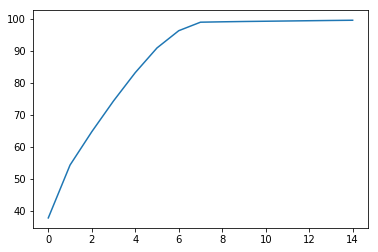

In [17]:
plt.plot(var1)

In [18]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

7

In [19]:
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
X_train_pca.shape

(46660, 7)

In [21]:
X_test_pca.shape

(11665, 7)

## Visualize the Train & Test Accuracies

In [22]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train Accuracy Score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test Accuracy Score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train Accuracy Score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test Accuracy Score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

## Grid Search, Cross Validation with Linear Regression

In [23]:
linreg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

lreg_grid_search = GridSearchCV(linreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
lreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(lreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lreg_grid_search.best_score_))

Best parameters: {'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.02


In [24]:
lreg_accuracy_train = lreg_grid_search.best_estimator_.score(X_train_pca, y_train)
lreg_accuracy_test = lreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Regression - Train Accuracy: %.2f'%lreg_accuracy_train)
print('Linear Regression - Test Accuracy: %.2f '%lreg_accuracy_test)

Linear Regression - Train Accuracy: 0.02
Linear Regression - Test Accuracy: 0.02 


In [25]:
lregresults = pd.DataFrame(lreg_grid_search.cv_results_)
lregresults['identifier'] = lregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))

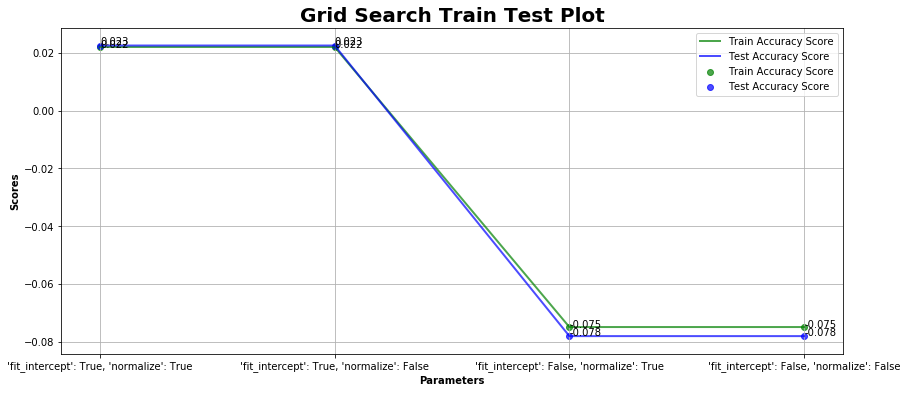

In [26]:
grid_train_test_plot(lregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'show')

In [27]:
report_table = [['Linear Regression', str(lreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lreg_accuracy_train,lreg_accuracy_test ]]

## Grid Search, Cross Validation with SGD Regression

SGD is an iterative method which minimizes the cost function with random individual samples. The gradient of the loss is estimated one sample at a time and the model is updated along the way with a decreasing  learning rate.

When predicting the dependent variable for this dataset, SGD Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores. The model performance improves with increased iterations and prediction scores are optimal when penalizing with l1 regularizer over l2.

In [28]:
sgdreg=SGDRegressor(random_state=18)
parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'], 'penalty':[None,'l2','l1','elasticnet'],'alpha':[0.0001,0.001,0.01,0.05,0.1,1,10],'learning_rate':['constant','optimal','invscaling'] }

sgdreg_grid_search = GridSearchCV(sgdreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
sgdreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(sgdreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(sgdreg_grid_search.best_score_))

Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'l1'}
Best cross-validation score: 0.02


In [29]:
sgdreg_accuracy_train = sgdreg_grid_search.best_estimator_.score(X_train_pca, y_train)
sgdreg_accuracy_test = sgdreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('SGD Regression - Train Accuracy: %.2f'%sgdreg_accuracy_train)
print('SGD Regression - Test Accuracy: %.2f '%sgdreg_accuracy_test)

SGD Regression - Train Accuracy: 0.02
SGD Regression - Test Accuracy: 0.02 


In [30]:
sgdregresults = pd.DataFrame(sgdreg_grid_search.cv_results_)
sgdregresults['identifier'] = sgdregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))

In [32]:
report_table = report_table + [['SGD Regression', str(sgdreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),sgdreg_accuracy_train,sgdreg_accuracy_test ]]

## Grid Search, Cross Validation with KNearestNeighbors

Regression based on k-nearest neighbors. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. When predicting the dependent variable for this dataset, KNN Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores.

In [33]:
knnreg = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(1,11,1)}
knnreg_grid_search = GridSearchCV(knnreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
knnreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(knnreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knnreg_grid_search.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

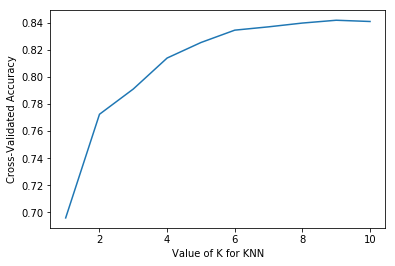

In [34]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in knnreg_grid_search.grid_scores_]
# plot the results cross-validation accuracy
plt.plot(np.arange(1,11,1), grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [35]:
knnresults = pd.DataFrame(knnreg_grid_search.cv_results_)

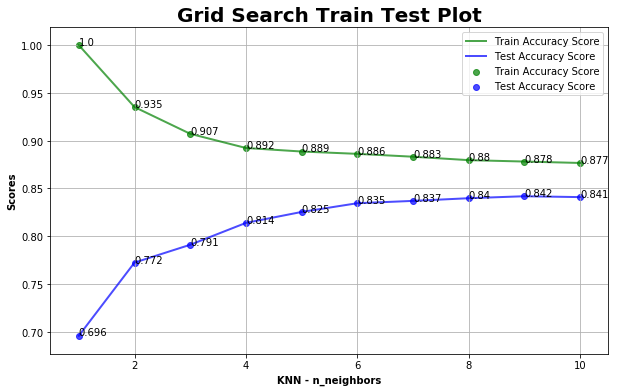

In [36]:
grid_train_test_plot(knnresults,'param_n_neighbors','mean_train_score','mean_test_score','Grid Search Train Test Plot','KNN - n_neighbors','Scores',10,6,'show')

In [37]:
knnreg_accuracy_train = knnreg_grid_search.best_estimator_.score(X_train_pca, y_train)
knnreg_accuracy_test = knnreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('KNN Regression - Train Accuracy: %.2f'%knnreg_accuracy_train)
print('KNN Regression - Test Accuracy: %.2f '%knnreg_accuracy_test)

KNN Regression - Train Accuracy: 0.88
KNN Regression - Test Accuracy: 0.86 


In [38]:
report_table = report_table + [['KNN Regression', str(knnreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),knnreg_accuracy_train,knnreg_accuracy_test ]]

## Grid Search, Cross Validation with Ridge Regression

Ridge Regression (also called Tikhonov regularization) solves a regression model where the loss function is the linear least squares function  (with l2 regularization) as opposed to ordinary least squares. 
This model minimizes the objective function: ||y - Xw||^2_2 + alpha * ||w||^2_2

In [39]:
ridgreg = Ridge(random_state=18)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False]}

ridgreg_grid_search = GridSearchCV(ridgreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
ridgreg_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(ridgreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridgreg_grid_search.best_score_))

Best parameters: {'alpha': 100, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.02


In [40]:
ridgregresults = pd.DataFrame(ridgreg_grid_search.cv_results_)
ridgregresults['identifier_name'] = ridgregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
ridgregresults['identifier'] = (ridgregresults.index)

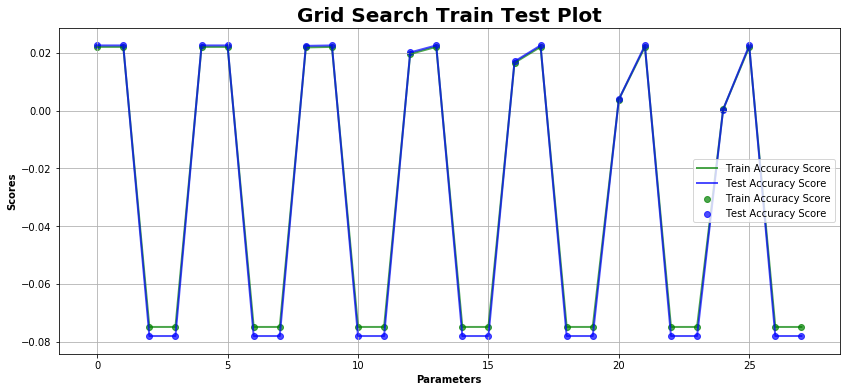

In [41]:
grid_train_test_plot(ridgregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [42]:
ridgreg_accuracy_train = ridgreg_grid_search.best_estimator_.score(X_train_pca, y_train)
ridgreg_accuracy_test = ridgreg_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Ridge Regression - Train Accuracy: %.2f'%ridgreg_accuracy_train)
print('Ridge Regression - Test Accuracy: %.2f '%ridgreg_accuracy_test)

Ridge Regression - Train Accuracy: 0.02
Ridge Regression - Test Accuracy: 0.02 


In [43]:
report_table = report_table + [['Ridge Regression', str(ridgreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),ridgreg_accuracy_train,ridgreg_accuracy_test ]]

## Grid Search, Cross Validation with LASSO Regression

LASSO or Least Absolute Shrinkage and Selection Operator is a Linear Model trained with L1 prior as regularizer.
The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Compared to Ridge regression that can't zero out coefficients, the LASSO does both parameter shrinkage and variable selection automatically. (In Ridge, we either end up including all the coefficients in the model, or none of them at all)

In [44]:
lassoreg = Lasso(random_state=18)
parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False],'selection':['cyclic','random']}

lasso_grid_search = GridSearchCV(lassoreg, parameters, cv=5, return_train_score=True, n_jobs = -1)
lasso_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(lasso_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lasso_grid_search.best_score_))

Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
Best cross-validation score: 0.02


In [45]:
lassoregresults = pd.DataFrame(lasso_grid_search.cv_results_)
lassoregresults['identifier_name'] = lassoregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
lassoregresults['identifier'] = (lassoregresults.index)

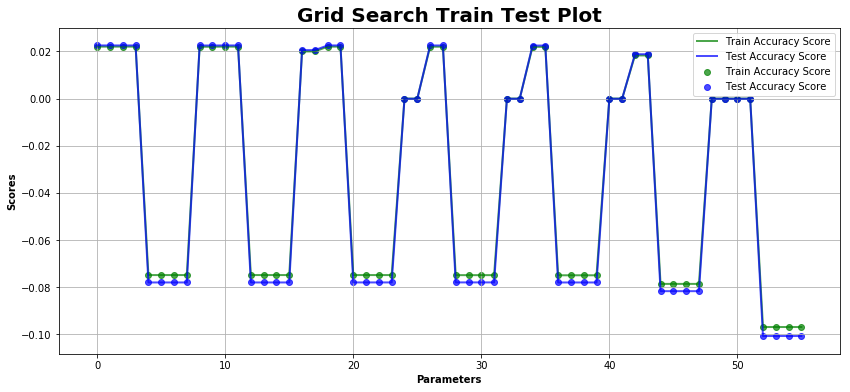

In [46]:
grid_train_test_plot(lassoregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [47]:
lassoreg_accuracy_train = lasso_grid_search.best_estimator_.score(X_train_pca, y_train)
lassoreg_accuracy_test = lasso_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Lasso Regression - Train Accuracy: %.2f'%lassoreg_accuracy_train)
print('Lasso Regression - Test Accuracy: %.2f '%lassoreg_accuracy_test)

Lasso Regression - Train Accuracy: 0.02
Lasso Regression - Test Accuracy: 0.02 


In [48]:
report_table = report_table + [['Lasso Regression', str(lasso_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lassoreg_accuracy_train,lassoreg_accuracy_test ]]

## Grid Search, Cross Validation with Polynomial Regression

We run a linear model after exponentially transforming the feature set. However this model performed poorly when using the 2nd and 3rd degree transformations of the feature set and was computationally demanding (impossible with available memory) to check higher degrees.

In [49]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [50]:
param_grid = {'polynomialfeatures__degree': np.arange(2,3),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

poly_grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=2, n_jobs = -1)

poly_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(poly_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid_search.best_score_))

Best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: 0.19


In [51]:
polyregresults = pd.DataFrame(poly_grid_search.cv_results_)
polyregresults['identifier_name'] = polyregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
polyregresults['identifier'] = polyregresults.index

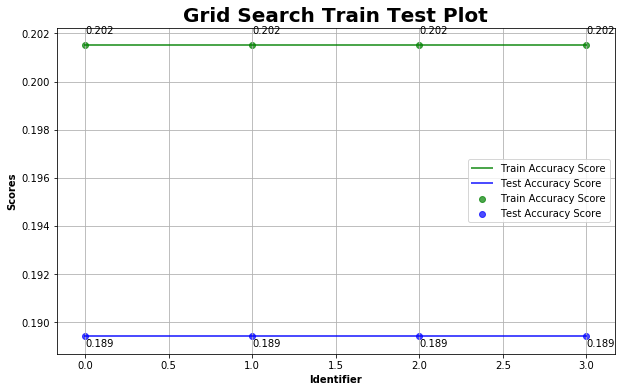

In [52]:
grid_train_test_plot(polyregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',10,6,'show')

In [53]:
polyreg_accuracy_train = poly_grid_search.best_estimator_.score(X_train_pca, y_train)
polyreg_accuracy_test = poly_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Polynomial Regression - Train Accuracy: %.2f'%polyreg_accuracy_train)
print('Polynomial Regression - Test Accuracy: %.2f '%polyreg_accuracy_test)

Polynomial Regression - Train Accuracy: 0.20
Polynomial Regression - Test Accuracy: 0.23 


In [54]:
report_table = report_table + [['Polynomial Regression', str(poly_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),polyreg_accuracy_train,polyreg_accuracy_test ]]

## Grid Search, Cross Validation with Linear SVR

Linear SVR is Linear Support Vector Regression (without kernels). This method tries to form a hyper-plane which accomodates as many points along its edges.

According to sklearn, SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. This class supports both dense and sparse input.

The model performed optimally when gamma = 1, epsilon =  0.1 and loss function set to "squared_epsilon_insensitive" (l2)

In [55]:
linsvrreg = LinearSVR(random_state=18)
parameters = {'C':[0.1,1,10],'epsilon':[0.1,1], 'loss':['epsilon_insensitive', 'squared_epsilon_insensitive']}

linsvr_grid_search = GridSearchCV(linsvrreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
linsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(linsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(linsvr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   30.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   36.0s finished


Best parameters: {'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.02


In [56]:
linsvrresults = pd.DataFrame(linsvr_grid_search.cv_results_)
linsvrresults['identifier_name'] = linsvrresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
linsvrresults['identifier'] = (linsvrresults.index)

In [57]:
X_train_pca.shape

(46660, 7)

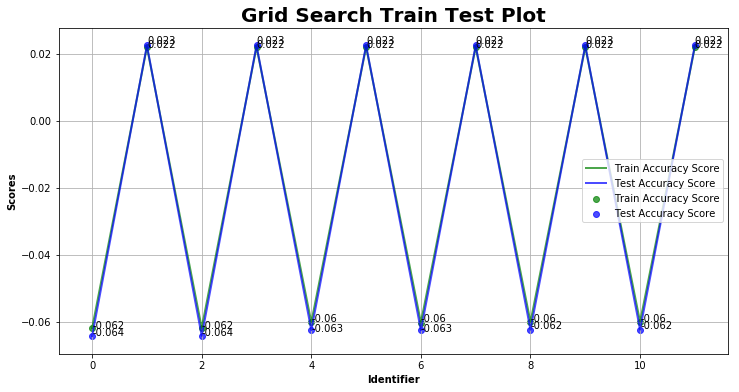

In [58]:
grid_train_test_plot(linsvrresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [59]:
linsvrreg_accuracy_train = linsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
linsvrreg_accuracy_test = linsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear SVR Regression - Train Accuracy: %.2f'%linsvrreg_accuracy_train)
print('Linear SVR Regression - Test Accuracy: %.2f '%linsvrreg_accuracy_test)

Linear SVR Regression - Train Accuracy: 0.02
Linear SVR Regression - Test Accuracy: 0.02 


In [60]:
report_table = report_table + [['Linear SVR Regression', str(linsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),linsvrreg_accuracy_train,linsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with Linear Kernel SVR

In [61]:
svrlinreg = SVR(kernel='linear')
parameters = {'C':[0.1,1,10],'epsilon':[0.1,1]}

lsvr_grid_search = GridSearchCV(svrlinreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
lsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(lsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(lsvr_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.1min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  9.7min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 11.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.8min finished


Best parameters: {'C': 10, 'epsilon': 0.1}
Best cross-validation score: -0.06


In [62]:
svrlinresults = pd.DataFrame(lsvr_grid_search.cv_results_)
svrlinresults['identifier'] = svrlinresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))

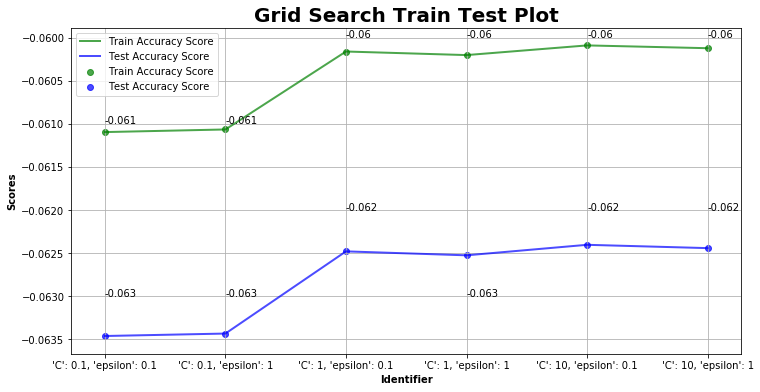

In [63]:
grid_train_test_plot(svrlinresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [64]:
lsvrreg_accuracy_train = lsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
lsvrreg_accuracy_test = lsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Linear Kernel SVR Regression - Train Accuracy: %.2f'%lsvrreg_accuracy_train)
print('Linear Kernel SVR Regression - Test Accuracy: %.2f '%lsvrreg_accuracy_test)

Linear Kernel SVR Regression - Train Accuracy: -0.06
Linear Kernel SVR Regression - Test Accuracy: -0.06 


In [65]:
report_table = report_table + [['Linear Kernel SVR Regression', str(lsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),lsvrreg_accuracy_train,lsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with rbf Kernel SVR

In [66]:
svrrbfreg = SVR(kernel='rbf')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'epsilon':[0.1,1]}

rsvr_grid_search = GridSearchCV(svrrbfreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
rsvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(rsvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rsvr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 26.5min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.8min finished


Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validation score: -0.07


In [67]:
svrrbfresults = pd.DataFrame(rsvr_grid_search.cv_results_)
svrrbfresults['identifier_name'] = svrrbfresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
svrrbfresults['identifier'] = svrrbfresults.index

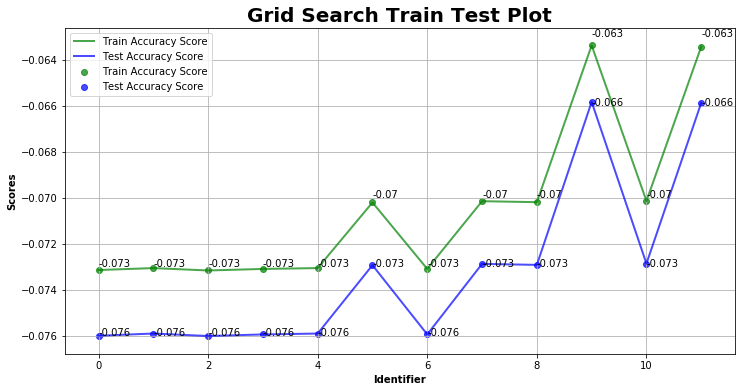

In [68]:
grid_train_test_plot(svrrbfresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'show')

In [69]:
rsvrreg_accuracy_train = rsvr_grid_search.best_estimator_.score(X_train_pca, y_train)
rsvrreg_accuracy_test = rsvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Rbf SVR Regression - Train Accuracy: %.2f'%rsvrreg_accuracy_train)
print('Rbf SVR Regression - Test Accuracy: %.2f '%rsvrreg_accuracy_test)

Rbf SVR Regression - Train Accuracy: -0.06
Rbf SVR Regression - Test Accuracy: -0.06 


In [70]:
report_table = report_table + [['Rbf Kernel SVR Regression', str(rsvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),rsvrreg_accuracy_train,rsvrreg_accuracy_test ]]

## Grid Search, Cross Validation with poly Kernel SVR

In [71]:
svrpolyreg = SVR(kernel='poly')
parameters = {'C':[0.1,1,10],'gamma':[0.0001,0.001],'degree':[2,3],'epsilon':[0.1,1]}
psvr_grid_search = GridSearchCV(svrpolyreg, parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=10)
psvr_grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(psvr_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(psvr_grid_search.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed: 50.7min remaining:   51.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 51.0min finished


Best parameters: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validation score: -0.08


In [72]:
svrpolyresults = pd.DataFrame(psvr_grid_search.cv_results_)
svrpolyresults['identifier_name'] = svrpolyresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
svrpolyresults['identifier'] = svrpolyresults.index

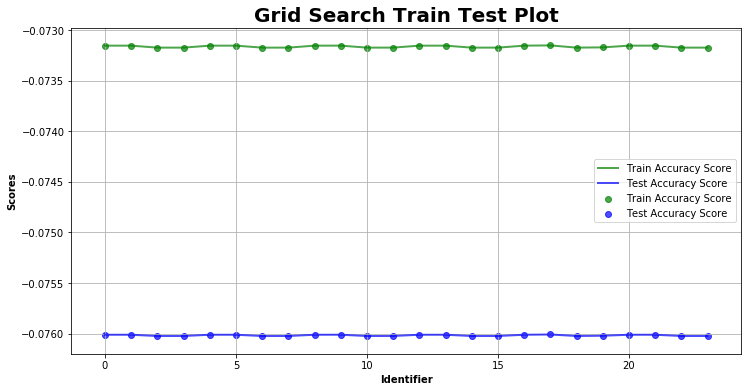

In [73]:
grid_train_test_plot(svrpolyresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Identifier','Scores',12,6,'hide')

In [74]:
psvrreg_accuracy_train = psvr_grid_search.best_estimator_.score(X_train_pca, y_train)
psvrreg_accuracy_test = psvr_grid_search.best_estimator_.score(X_test_pca, y_test)

print('Poly SVR Regression - Train Accuracy: %.2f'%psvrreg_accuracy_train)
print('Poly SVR Regression - Test Accuracy: %.2f '%psvrreg_accuracy_test)

Poly SVR Regression - Train Accuracy: -0.07
Poly SVR Regression - Test Accuracy: -0.07 


In [75]:
report_table = report_table + [['Poly Kernel SVR Regression', str(psvr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),psvrreg_accuracy_train,psvrreg_accuracy_test ]]

In [76]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy'])
report.index = report['Model Name']
report.drop(['Model Name'], axis=1,inplace=True)
report

,Model Parameters,Train Accuracy,Test Accuracy
Model Name,,,
Linear Regression,"fit_intercept: True, normalize: True",0.021966,0.021729
SGD Regression,"alpha: 0.1, learning_rate: optimal, loss: squared_loss, penalty: l1",0.021935,0.021682
KNN Regression,n_neighbors: 9,0.879199,0.857964
Ridge Regression,"alpha: 100, fit_intercept: True, normalize: False",0.021962,0.021711
Lasso Regression,"alpha: 0.1, fit_intercept: True, normalize: False, selection: random",0.021964,0.021728
Polynomial Regression,"linearregression__fit_intercept: True, linearregression__normalize: True, polynomialfeatures__degree: 2",0.200004,0.226134
Linear SVR Regression,"C: 0.1, epsilon: 0.1, loss: squared_epsilon_insensitive",0.021966,0.021728
Linear Kernel SVR Regression,"C: 10, epsilon: 0.1",-0.059854,-0.059360
Rbf Kernel SVR Regression,"C: 10, epsilon: 0.1, gamma: 0.001",-0.062791,-0.062256


_Train and test scores of KNN Regression is best and around 87% and 85% respectively and is the best model for PCA applied dataset._

In [77]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Regression',''))

In [78]:
old_table.index=old_table['Model Name']
old_table.drop(['Model Name'],axis=1,inplace=True)

In [79]:
old_table['identifier'] = old_table.index
old_table['identifier'] = old_table.identifier.apply(lambda x: str(x).replace('Regression','').replace('Support Vector Machine','SVM'))

In [80]:
old_table

,Model Parameters,Train Accuracy,Test Accuracy,identifier
Model Name,,,,
Linear Regression,"fit_intercept: True, normalize: True",0.945702,0.962427,Linear
SGD Regression,"alpha: 0.05, learning_rate: constant, loss: squared_epsilon_insensitive, penalty: l1",0.923512,0.931561,SGD
KNN Regression,n_neighbors: 4,0.945159,0.893353,KNN
Ridge Regression,"alpha: 0.01, fit_intercept: True, normalize: True",0.943249,0.960212,Ridge
Lasso Regression,"alpha: 0.01, fit_intercept: False, normalize: True, selection: random",0.943651,0.961776,Lasso
Polynomial Regression,"linearregression__fit_intercept: False, linearregression__normalize: True, polynomialfeatures__degree: 2",0.981160,0.227186,Polynomial
Linear SVR Regression,"C: 1, epsilon: 0.1, loss: squared_epsilon_insensitive",0.942715,0.959531,Linear SVR
Linear Kernel SVR Regression,"C: 10, epsilon: 1",0.843607,0.874634,Linear Kernel SVR
Rbf Kernel SVR Regression,"C: 10, epsilon: 1, gamma: 0.001",-0.038596,-0.036365,Rbf Kernel SVR


### PCA Fitted Hypertuned Models Plot - Training Data

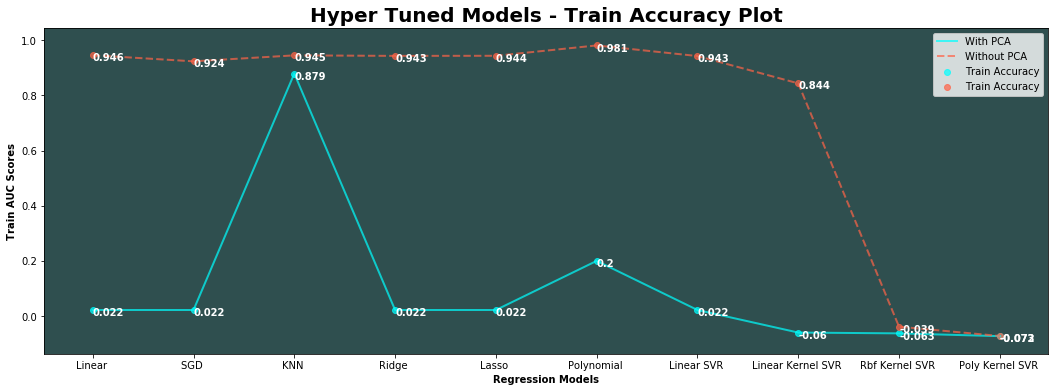

In [81]:
%matplotlib inline
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
opacity=0.7
ax.plot(report['identifier'], report['Train Accuracy'], c = 'cyan',linewidth=2,alpha=opacity,label='With PCA')
#ax.plot(report['identifier'], report['Test AUC Score'], c = 'green',linewidth=2,alpha=opacity)
ax.scatter(report['identifier'], report['Train Accuracy'], c = 'cyan',alpha=opacity)
#ax.scatter(report['identifier'], report['Test AUC Score'], c = 'green',alpha=opacity)
ax.plot(old_table['identifier'], old_table['Train Accuracy'], '--',c = 'tomato',linewidth=2,alpha=opacity,label='Without PCA')
#ax.plot(old_table['identifier'], old_table['Test AUC Score'], c = 'lightgreen',linewidth=2,alpha=opacity)
ax.scatter(old_table['identifier'], old_table['Train Accuracy'], c = 'tomato',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Train Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
for i,j in zip(old_table['identifier'],round(old_table['Train Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Train Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=10,weight='bold')
ax.set_ylabel('Train AUC Scores',fontsize=10,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

### PCA Fitted Hypertuned Models Plot - Testing Data

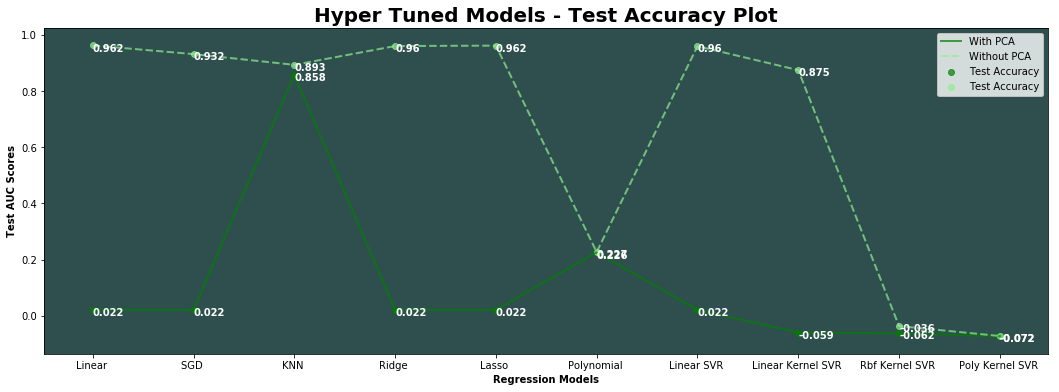

In [82]:
%matplotlib inline
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
opacity=0.7
#ax.plot(report['identifier'], report['Train AUC Score'], '--',c = 'cyan',linewidth=2,alpha=opacity,label='With PCA')
ax.plot(report['identifier'], report['Test Accuracy'], c = 'green',linewidth=2,alpha=opacity,label='With PCA')
#ax.scatter(report['identifier'], report['Train AUC Score'], c = 'cyan',alpha=opacity)
ax.scatter(report['identifier'], report['Test Accuracy'], c = 'green',alpha=opacity)
#ax.plot(old_table['identifier'], old_table['Train AUC Score'], '--',c = 'tomato',linewidth=2,alpha=opacity,label='Without PCA')
ax.plot(old_table['identifier'], old_table['Test Accuracy'],'--', c = 'lightgreen',linewidth=2,alpha=opacity,label='Without PCA')
ax.scatter(old_table['identifier'], old_table['Test Accuracy'], c = 'lightgreen',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Test Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
for i,j in zip(old_table['identifier'],round(old_table['Test Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.02),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Test Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=10,weight='bold')
ax.set_ylabel('Test AUC Scores',fontsize=10,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

## Comparison Study

#### Looking at the plots of Train and Test scores for all the models, we found the following
- In dimensionally reduced dataset, leaving out KNN regressor the accuracies of all other regressors are nearly equal to zero.
- KNN Regressor can be considered as one of the best model irrespective of applying PCA or not.
- On the whole, applying PCA on this dataset has not helped in improving the model accuracies.

Though PCA has reduced number of dimensions but the accuracy scores of most of the models like Linear,SGD,Ridge, Lasso,Polynomial, Linear SVM, Kernel SVMs have been significantly affected. Except KNN Regressor, they haven't taken a significant toll on their accuracy scores. Also, by applying PCA to our dataset, we loose ability to interpret the data.

## Deep Learning Regression Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
numpy.random.seed(18)

In [84]:
d

7

In [85]:
nn_model_reg = Sequential()
nn_model_reg.add(Dense(13, input_dim=d, kernel_initializer='normal', activation='relu'))
nn_model_reg.add(Dense(1, kernel_initializer='normal'))

In [86]:
nn_model_reg.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [87]:
nn_model_reg.fit(X_train_pca, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
46660/46660 [==============================] - 3s 64us/step - loss: 388890.6284 - mean_squared_error: 388890.6284
Epoch 2/100
46660/46660 [==============================] - 3s 59us/step - loss: 388510.7645 - mean_squared_error: 388510.7645
Epoch 3/100
46660/46660 [==============================] - 3s 58us/step - loss: 388682.0247 - mean_squared_error: 388682.0247
Epoch 4/100
46660/46660 [==============================] - 3s 60us/step - loss: 388554.1599 - mean_squared_error: 388554.1599
Epoch 5/100
46660/46660 [==============================] - 3s 60us/step - loss: 388662.4940 - mean_squared_error: 388662.4940
Epoch 6/100
46660/46660 [==============================] - 3s 60us/step - loss: 388629.8826 - mean_squared_error: 388629.8826
Epoch 7/100
46660/46660 [==============================] - 3s 59us/step - loss: 388602.1678 - mean_squared_error: 388602.1678
Epoch 8/100
46660/46660 [==============================] - 3s 59us/step - loss: 388659.7545 - mean_squared_error: 3886

In [88]:
score, acc = nn_model_reg.evaluate(X_test_pca, y_test,
                            batch_size=400)
print('Test score:', score)
print('Test accuracy:', acc)

11665/11665 [==============================] - 0s 5us/step
Test score: 406173.4804972139
Test accuracy: 406173.4804972139


In [89]:
##R2 Scores
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = nn_model_reg.predict(X_train_pca)
y_test_predict = nn_model_reg.predict(X_test_pca)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.01
Test score: -0.00


################################################THE END############################################################